In [20]:
#libraries
import sqlite3
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import networkx as nx
import re
from wordcloud import WordCloud

In [33]:
#connection
conn = sqlite3.connect(r'C:\Users\20232788\Desktop\DBL-1\tweets.db')
cursor = conn.cursor()

In [3]:
#database to dataframe for statistical exploration

#easyjet
query_easy_all = 'SELECT * FROM tweets WHERE user_id =38676903'
easy_all = pd.read_sql_query(query_easy_all, conn)

#ryanair
query_ryan_all = 'SELECT * FROM tweets WHERE user_id =1542862735'
ryan_all = pd.read_sql_query(query_ryan_all, conn)

#british
query_brit_all = 'SELECT * FROM tweets WHERE user_id =18332190'
brit_all = pd.read_sql_query(query_brit_all, conn)

In [4]:
#replying users
query_users_all = '''
SELECT t.*
FROM tweets AS t, users AS u
WHERE t.user_id=u.id AND u.followers_count > 1000 AND t.in_reply_to_user_id_str IN (38676903, 1542862735, 18332190)
'''
users_all = pd.read_sql_query(query_users_all, conn)

In [5]:
#when airlines are mentioned
query_entities = '''
SELECT en.tweet_id, tweets.user_id, en.hashtags, en.user_mentions 
FROM entities AS en, tweets 
WHERE en.tweet_id=tweets.id AND tweets.user_id IN (38676903, 1542862735, 18332190)
'''
entities = pd.read_sql_query(query_entities, conn)


In [8]:
users_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40330 entries, 0 to 40329
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   id                         40330 non-null  int64 
 1   tweet_id_str               40330 non-null  object
 2   created_at                 40330 non-null  object
 3   in_reply_to_status_id_str  21385 non-null  object
 4   in_reply_to_user_id_str    40330 non-null  object
 5   lang                       40330 non-null  object
 6   quote_count                40330 non-null  int64 
 7   quoted_status_id_str       1020 non-null   object
 8   quoted_user_id             0 non-null      object
 9   reply_count                40330 non-null  int64 
 10  retweet_count              40330 non-null  int64 
 11  text                       40330 non-null  object
 12  truncated                  40330 non-null  int64 
 13  user_id                    40330 non-null  int64 
 14  possib

In [9]:
easy_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54725 entries, 0 to 54724
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   id                         54725 non-null  int64 
 1   tweet_id_str               54725 non-null  object
 2   created_at                 54725 non-null  object
 3   in_reply_to_status_id_str  53885 non-null  object
 4   in_reply_to_user_id_str    54534 non-null  object
 5   lang                       54725 non-null  object
 6   quote_count                54725 non-null  int64 
 7   quoted_status_id_str       16 non-null     object
 8   quoted_user_id             0 non-null      object
 9   reply_count                54725 non-null  int64 
 10  retweet_count              54725 non-null  int64 
 11  text                       54725 non-null  object
 12  truncated                  54725 non-null  int64 
 13  user_id                    54725 non-null  int64 
 14  possib

In [10]:
ryan_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20316 entries, 0 to 20315
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   id                         20316 non-null  int64 
 1   tweet_id_str               20316 non-null  object
 2   created_at                 20316 non-null  object
 3   in_reply_to_status_id_str  19119 non-null  object
 4   in_reply_to_user_id_str    19122 non-null  object
 5   lang                       20316 non-null  object
 6   quote_count                20316 non-null  int64 
 7   quoted_status_id_str       14 non-null     object
 8   quoted_user_id             0 non-null      object
 9   reply_count                20316 non-null  int64 
 10  retweet_count              20316 non-null  int64 
 11  text                       20316 non-null  object
 12  truncated                  20316 non-null  int64 
 13  user_id                    20316 non-null  int64 
 14  possib

In [11]:
brit_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106646 entries, 0 to 106645
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   id                         106646 non-null  int64 
 1   tweet_id_str               106646 non-null  object
 2   created_at                 106646 non-null  object
 3   in_reply_to_status_id_str  106524 non-null  object
 4   in_reply_to_user_id_str    106556 non-null  object
 5   lang                       106646 non-null  object
 6   quote_count                106646 non-null  int64 
 7   quoted_status_id_str       3 non-null       object
 8   quoted_user_id             0 non-null       object
 9   reply_count                106646 non-null  int64 
 10  retweet_count              106646 non-null  int64 
 11  text                       106646 non-null  object
 12  truncated                  106646 non-null  int64 
 13  user_id                    106646 non-null  

In [12]:
ryan_all.head()

,id,tweet_id_str,created_at,in_reply_to_status_id_str,in_reply_to_user_id_str,lang,quote_count,quoted_status_id_str,quoted_user_id,reply_count,retweet_count,text,truncated,user_id,possibly_sensitive
0,1131173947704303618,1131173947704303618,Wed May 22 12:24:19 +0000 2019,1131171987135631366,120758842,en,0,None,None,0,0,@DabottIe We recommend you to contact our spec...,0,1542862735,0
1,1131174859474702336,1131174859474702336,Wed May 22 12:27:57 +0000 2019,1131171962200514561,523152311,en,0,None,None,0,0,"@kitty_cat76 @SECRETESCAPES Hi, please contact...",0,1542862735,0
2,1131175566659510273,1131175566659510273,Wed May 22 12:30:45 +0000 2019,1131164135910236160,82953607,en,0,None,None,0,0,"@AnjleeB Hi, may we have DM the booking refer...",0,1542862735,0
3,1131176025336025089,1131176025336025089,Wed May 22 12:32:35 +0000 2019,1131172009910648836,192290694,en,0,None,None,0,0,"@Crozzy1971 Sorry for the inconvenience, if yo...",0,1542862735,0
4,1131180770738036736,1131180770738036736,Wed May 22 12:51:26 +0000 2019,1131173345918148609,21404541,en,0,None,None,0,0,"@squireknottyash Hi, if you need any assistanc...",0,1542862735,0


Bar plot for language usage per sample company

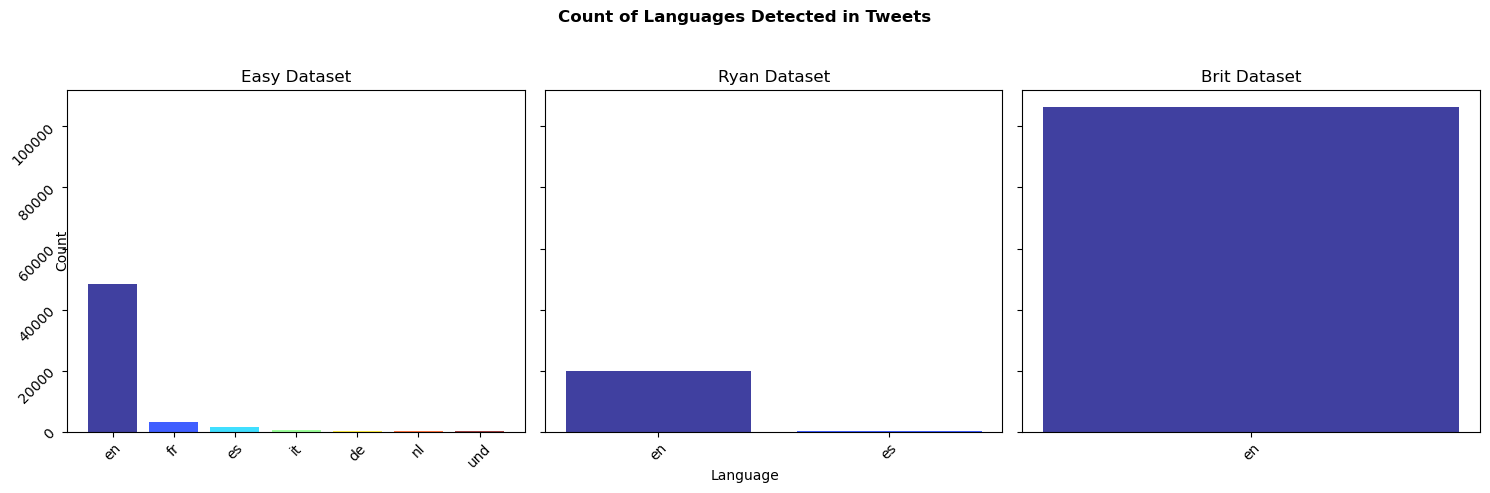

In [13]:
# Count the number of occurrences of each language and erase those who have less than a 100 entries
language_easy = easy_all['lang'].value_counts()
language_easy = language_easy[language_easy >= 100]

language_ryan = ryan_all['lang'].value_counts()
language_ryan = language_ryan[language_ryan >= 100]

language_brit = brit_all['lang'].value_counts()
language_brit = language_brit[language_brit >= 100]


max_colors_needed = max(len(language_easy), len(language_ryan), len(language_brit))
colors = plt.cm.jet(np.linspace(0, 1, max_colors_needed))


fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True)

# Bar plot for 'language_easy'
ax[0].bar(language_easy.index, language_easy.values, color=colors, alpha=0.75)
ax[0].set_title('Easy Dataset')
ax[0].tick_params(labelrotation=45)

# Bar plot for 'language_ryan'
ax[1].bar(language_ryan.index, language_ryan.values, color=colors, alpha=0.75)
ax[1].set_title('Ryan Dataset')
ax[1].tick_params(labelrotation=45)

# Bar plot for 'language_brit'
ax[2].bar(language_brit.index, language_brit.values, color=colors, alpha=0.75)
ax[2].set_title('Brit Dataset')
ax[2].tick_params(labelrotation=45)


fig.text(0.5, 0.04, 'Language', ha='center')
fig.text(0.04, 0.5, 'Count', va='center', rotation='vertical')
plt.suptitle('Count of Languages Detected in Tweets', weight='bold')


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Superimposed histogram of quantity of tweets per week per company

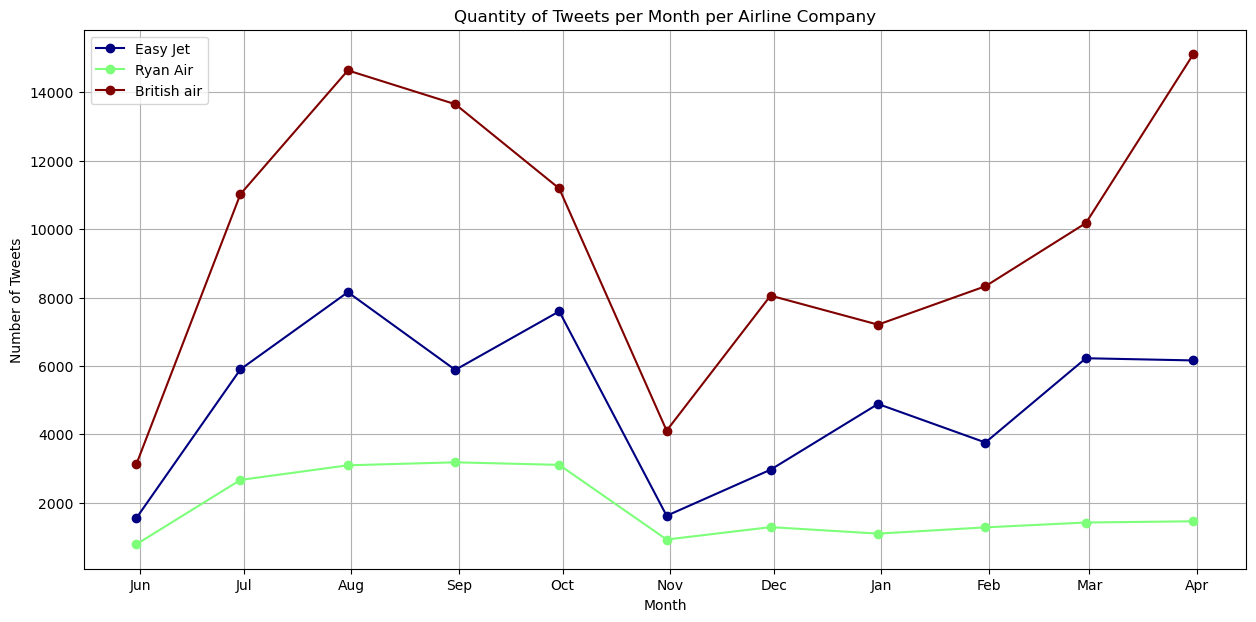

In [14]:
# Convert 'created_at' to datetime
easy_all['created_at'] = pd.to_datetime(easy_all['created_at'], format='%a %b %d %H:%M:%S %z %Y')
ryan_all['created_at'] = pd.to_datetime(ryan_all['created_at'], format='%a %b %d %H:%M:%S %z %Y')
brit_all['created_at'] = pd.to_datetime(brit_all['created_at'], format='%a %b %d %H:%M:%S %z %Y')


tweets_per_month_easy = easy_all.resample('M', on='created_at').size()
tweets_per_month_ryan = ryan_all.resample('M', on='created_at').size()
tweets_per_month_brit = brit_all.resample('M', on='created_at').size()


plt.figure(figsize=(15, 7))

colors = plt.cm.jet(np.linspace(0, 1, 3))

plt.plot(tweets_per_month_easy.index, tweets_per_month_easy.values, color=colors[0], marker='o', linestyle='-', label='Easy Jet')
plt.plot(tweets_per_month_ryan.index, tweets_per_month_ryan.values, color=colors[1], marker='o', linestyle='-', label='Ryan Air')
plt.plot(tweets_per_month_brit.index, tweets_per_month_brit.values, color=colors[2], marker='o', linestyle='-', label='British air')

plt.xlabel('Month')
plt.ylabel('Number of Tweets')
plt.title('Quantity of Tweets per Month per Airline Company')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())

plt.legend()
plt.grid(True)

plt.show()

In [3]:
keywords = ["customer service", "support", "help", "assistance", "response time", 
            "agent", "satisfaction", "complaint", "issue", "problem", "resolve"]

# Create the query
query = "SELECT * FROM tweets WHERE " + " OR ".join(f"text LIKE '%{keyword}%'" for keyword in keywords)

# Use pandas to execute the query and fetch the result as a DataFrame
customer_service = pd.read_sql_query(query, conn)

In [7]:
customer_service.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325770 entries, 0 to 325769
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   id                         325770 non-null  int64 
 1   tweet_id_str               325770 non-null  object
 2   created_at                 325770 non-null  object
 3   in_reply_to_status_id_str  125897 non-null  object
 4   in_reply_to_user_id_str    179065 non-null  object
 5   lang                       325770 non-null  object
 6   quote_count                325770 non-null  int64 
 7   quoted_status_id_str       34735 non-null   object
 8   quoted_user_id             0 non-null       object
 9   reply_count                325770 non-null  int64 
 10  retweet_count              325770 non-null  int64 
 11  text                       325770 non-null  object
 12  truncated                  325770 non-null  int64 
 13  user_id                    325770 non-null  

In [8]:
keywords = ["customer service"]

# Create the query
query = "SELECT * FROM tweets WHERE " + " OR ".join(f"text LIKE '%{keyword}%'" for keyword in keywords)

# Use pandas to execute the query and fetch the result as a DataFrame
customer_service_only = pd.read_sql_query(query, conn)

In [9]:
customer_service_only.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44975 entries, 0 to 44974
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   id                         44975 non-null  int64 
 1   tweet_id_str               44975 non-null  object
 2   created_at                 44975 non-null  object
 3   in_reply_to_status_id_str  12022 non-null  object
 4   in_reply_to_user_id_str    24838 non-null  object
 5   lang                       44975 non-null  object
 6   quote_count                44975 non-null  int64 
 7   quoted_status_id_str       5369 non-null   object
 8   quoted_user_id             0 non-null      object
 9   reply_count                44975 non-null  int64 
 10  retweet_count              44975 non-null  int64 
 11  text                       44975 non-null  object
 12  truncated                  44975 non-null  int64 
 13  user_id                    44975 non-null  int64 
 14  possib

In [26]:
#hashtags
query_hashtags = 'SELECT hashtags FROM entities'
hashtags = pd.read_sql_query(query_hashtags, conn)

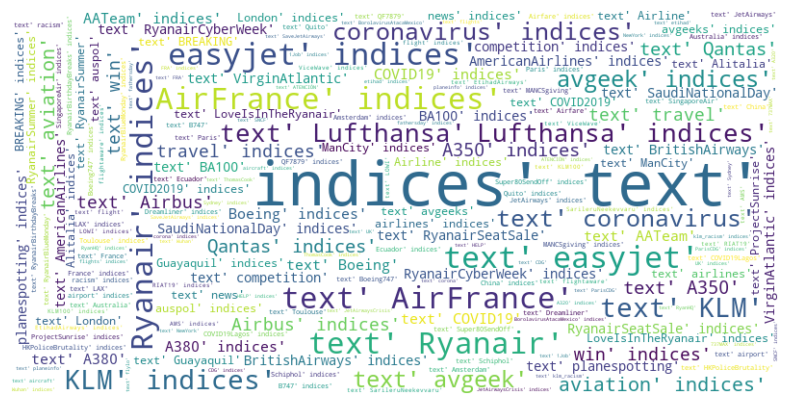

In [27]:
hashtags_series = pd.Series(hashtags['hashtags'])

# Combine all hashtags into a single string
all_hashtags = ' '.join(hashtags_series)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_hashtags)

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [37]:
# Query to fetch tweet data with created_at timestamp
query = """
    SELECT created_at
    FROM tweets
"""

# Execute query and fetch data into a pandas DataFrame
tweet_data = pd.read_sql(query, conn)

tweet_data['created_at'] = pd.to_datetime(tweet_data['created_at'], format='%a %b %d %H:%M:%S %z %Y')

# Extract day of the week and hour of the day
tweet_data['day_of_week'] = tweet_data['created_at'].dt.dayofweek
tweet_data['hour_of_day'] = tweet_data['created_at'].dt.hour

# Map day_of_week values to corresponding day names
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
tweet_data['day_of_week'] = tweet_data['day_of_week'].map(lambda x: day_names[x])

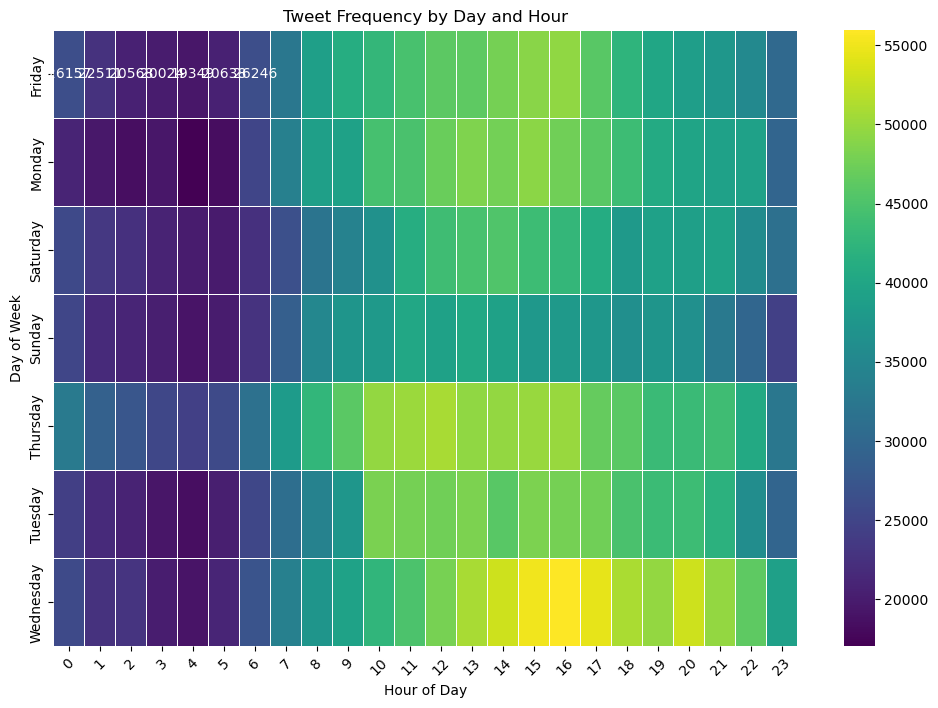

In [38]:
# Plot the distribution of tweets by day and hour
plt.figure(figsize=(12, 8))
sns.heatmap(tweet_data.groupby(['day_of_week', 'hour_of_day']).size().unstack(), cmap='viridis', annot=True, fmt='d', linewidths=.5)
plt.title('Tweet Frequency by Day and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.xticks(rotation=45)
plt.show()

In [42]:
arlines = {
    'KLM': 56377143,
    'AirFrance': 106062176,
    'British_Airways': 18332190,
    'AmericanAir': 22536055,
    'Lufthansa': 124476322,
    'AirBerlin': 26223583,
    'AirBerlin assist': 2182373406,
    'easyJet': 38676903,
    'RyanAir': 1542862735,
    'SingaporeAir': 253340062,
    'Qantas': 218730857,
    'EtihadAirways': 45621423,
    'VirginAtlantic': 20626359
}

id_values = tuple(arlines.values())
id_list = ','.join(map(str, id_values))

query = f"SELECT name, followers_count FROM users WHERE id IN ({id_list})"

arlines_df = pd.read_sql(query, conn)

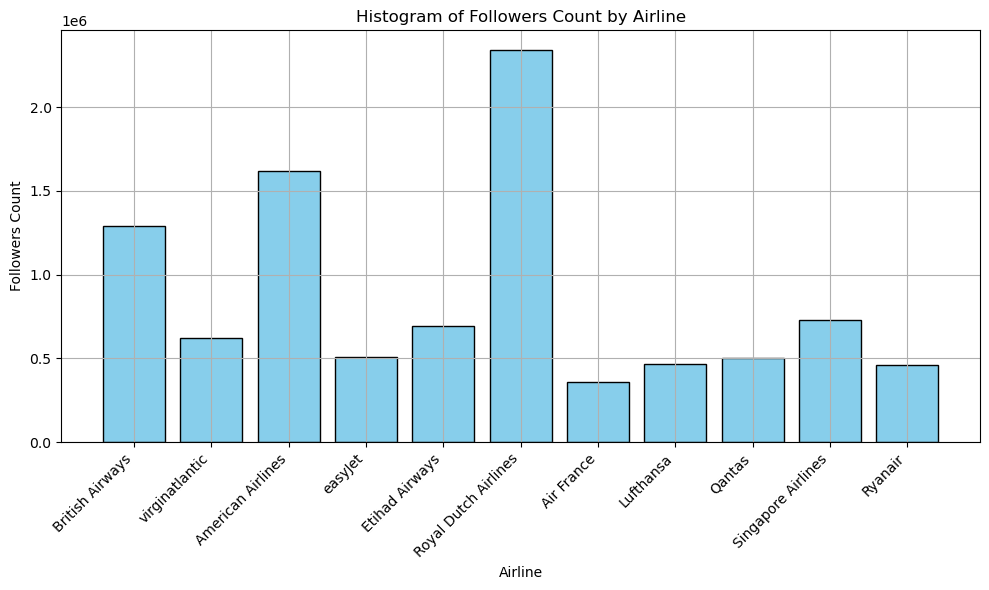

In [57]:
plt.figure(figsize=(10, 6))
plt.bar(arlines_df['name'], arlines_df['followers_count'], color='skyblue', edgecolor='black')
plt.xlabel('Airline')
plt.ylabel('Followers Count')
plt.title('Histogram of Followers Count by Airline')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()

plt.show()

In [ ]:
def build_tree(tweet_id):
    # Query to get the user_id of the current tweet
    cursor.execute("SELECT user_id FROM tweets WHERE id = ?", (tweet_id,))
    user_id = cursor.fetchone()[0]

    # Query to get the tweets that are in reply to the current tweet
    cursor.execute("SELECT id FROM tweets WHERE in_reply_to_status_id_str = ?", (tweet_id,))
    replies = cursor.fetchall()

    # If there are no replies, return None
    if not replies:
        return None

    # If there are replies, this is an internal node. Recursively build the tree for each of the replies
    return {
        "tweet_id": tweet_id,
        "user_id": user_id,
        "replies": [reply for reply in (build_tree(reply_id) for (reply_id,) in replies) if reply is not None]
    }

# Query to get the root tweets (those that are not in reply to any other tweet)
cursor.execute("SELECT id FROM tweets WHERE in_reply_to_status_id_str IS NULL")
roots = cursor.fetchall()

# Build the tree starting from each root tweet for the first 5 roots
first_conversations = []
count = 0
for (root_id,) in roots:
    # Check if the root has replies before building the tree
    cursor.execute("SELECT id FROM tweets WHERE in_reply_to_status_id_str = ?", (root_id,))
    if cursor.fetchone() is not None:
        tree = build_tree(root_id)
        if tree is not None:
            first_conversations.append(tree)
            count += 1
        if count == 50:
            break

In [ ]:
def draw_graph(tree, graph=None):
    if graph is None:
        graph = nx.DiGraph()

    # Add the user_id attribute to the node
    graph.add_node(tree["tweet_id"], user_id=tree["user_id"])

    if "replies" in tree:
        for reply in tree["replies"]:
            print(f"Adding edge from {tree['user_id']} to {reply['user_id']}")
            graph.add_edge(tree["tweet_id"], reply["tweet_id"])
            draw_graph(reply, graph)
    else:
        print(f"No replies for {tree['tweet_id']}")

    return graph

# Access the first tree
tree = first_conversations[0]

graph = draw_graph(tree)
nx.draw(graph, with_labels=True)
plt.show()

In [ ]:
def find_tree(trees, tweet_id):
    for tree in trees:
        if tree["tweet_id"] == tweet_id:
            return tree
        if "replies" in tree:
            result = find_tree(tree["replies"], tweet_id)
            if result is not None:
                return result
    return None

# Find the tree with the specific 'tweet_id'
tree = find_tree(first_conversations, 1131177391005601793)
graph = draw_graph(tree)
nx.draw(graph, with_labels=True)
plt.show()

In [ ]:
# Create a dictionary of labels mapping each tweet_id to a string containing both the tweet_id and user_id
labels = {node: f"user_id: {data.get('user_id')}" for node, data in graph.nodes(data=True)}

nx.draw(graph, labels=labels, with_labels=True, node_size=500)

plt.show

In [ ]:
print(find_tree(first_conversations, 1131177391005601793))

In [ ]:
graph.nodes(data=True)